In [22]:
# Dear students i have placed comments in the file at every respective section for your convenience
#ive made sure that you will not have to import any further libraries for this lab so the codes will run without any errors
#refer to lab tasks at the last section
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
#X and y are used to represent the input features and the target labels(class labels)
X = iris.data #we are assigning the variable X to is an attribute of the Iris dataset object, 
                #and it contains the feature data for the dataset. In the Iris dataset, 
                #there are four features: sepal length, sepal width, petal length, and petal width for various iris flowers.
y = iris.target #we are assigning Y which now contains the target labels or the class labels for the corresponding data points in the dataset.

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a KNN classifier with a specified value of k (e.g., k=3)
k = 3
knn = KNeighborsClassifier(n_neighbors=k) # here i can directly assign the value as well like we saw in class

# Fit the model to the training data like we saw in linear regression
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN with k={k}: {accuracy:.2f}")


Accuracy of KNN with k=3: 1.00


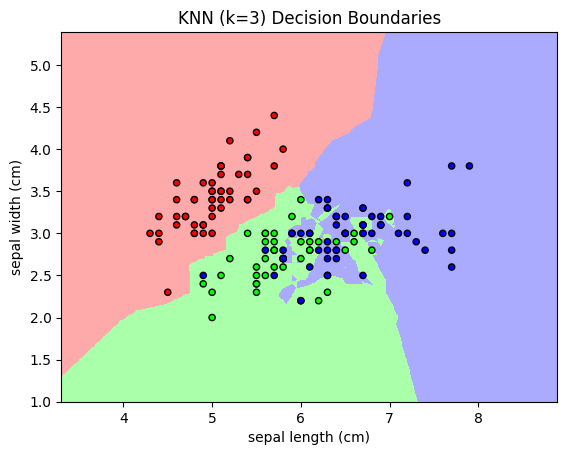

In [10]:
# This section focuses mainly on the visualization of the decision boundaries of the KNN classifier
#using MULTI CLASS CLASSIFICATION in this case we studied binary in class

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Create a mesh grid of points to make the plot
# As we understood how a dataframe is important for showing dataset in a tabular form,
# similarly a mesh grid is used to show the data in a grid form
X = iris.data[:, :2]  # Take the first two features for visualization
y = iris.target # Target labels

# Create a KNN classifier with a specified value of k
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y)
#the section below deals with the visualization of the decision boundaries of the KNN classifier
# Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 
#X[:, 0] extracts all the values from the first column of the feature data (the sepal length in the Iris dataset) for all data points.
#.min() is a NumPy array method that calculates the minimum value it gives you the minimum sepal length in the dataset.

y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 
#similar functionality which as explained above can be applied to this part think about it.
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
#This line assigns the resulting 2D arrays from np.meshgrid() to xx and yy. xx will contain all possible x-coordinates, and yy will contain all possible y-coordinates
#np.meshgrid() takes in two 1D arrays and outputs two 2D arrays. The first 2D array, xx, will contain the x-coordinates of all the points in the grid
#np.arange() is a NumPy array method that returns evenly spaced values for x_min wrt x_max within a given interval which in this case is 0.01
#again 0.01 is the step size, which determines the spacing between the values in the generated array. 
#np.arange(y_min, y_max, 0.01) this part generates an array of values within the specified range for the y-axis (sepal width)
# , using y_min and y_max calculated earlier, with a step size of 0.01.
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]) #this is used to predict the class labels for the corresponding data points in the grid.
#np.c_ is a NumPy array method that takes two 1D arrays and concatenates them along the second axis (the column axis).
#xx.ravel() is a NumPy array method that returns a flattened array.
Z = Z.reshape(xx.shape) #this is used to reshape the flattened array Z into a 2D array with the same shape as xx.

# Create a colormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']) #this is used to show the colors of the decision boundaries
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# this part is Plotting the decision boundary which is very starightforward
plt.figure() #this is used to create a new figure
plt.pcolormesh(xx, yy, Z, cmap=cmap_light) #this is used to plot the decision boundaries
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20) #this is used to plot the training points
plt.xlim(xx.min(), xx.max()) #this is used to set the x-axis limits of the plot
plt.ylim(yy.min(), yy.max()) #this is used to set the y-axis limits of the plot
plt.title(f"KNN (k={k}) Decision Boundaries") #this is used to set the title of the plot
plt.xlabel(iris.feature_names[0]) #this is used to set the x-axis label of the plot
plt.ylabel(iris.feature_names[1]) #this is used to set the y-axis label of the plot
plt.show() #this is used to display the plot


In [6]:
#Code for the logistic regression part

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

data = load_diabetes()
X = data.data
y = (data.target > 140).astype(int)  # Convert to binary labels (1 if target > 140, 0 otherwise)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
logistic_reg = LogisticRegression()

# Fit the model to the training data
logistic_reg.fit(X_train, y_train)

# Just like we fitted model in previous labs we are doing the same here we make predictions on the test data
y_pred = logistic_reg.predict(X_test)

# remember we used the accuracy_score function from sklearn.metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# here we display a classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.74
              precision    recall  f1-score   support

           0       0.77      0.76      0.76        49
           1       0.71      0.72      0.72        40

    accuracy                           0.74        89
   macro avg       0.74      0.74      0.74        89
weighted avg       0.74      0.74      0.74        89



In [4]:
# Code for the SVM part
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


data = load_diabetes()
X = data.data
y = (data.target > 140).astype(int)  # Convert to binary labels (1 if target > 140, 0 otherwise)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


svm_classifier = SVC(kernel='rbf') #The kernel parameter specifies the type of kernel to be used in the SVM. 
#In this case, we use the RBF (Radial Basis Function) kernel, which is a popular choice for handling non-linear classification.
# The RBF kernel is known for its ability to model complex decision boundaries

# fitting the model to the training data
svm_classifier.fit(X_train, y_train)

# makeing predictions on the test data
y_pred = svm_classifier.predict(X_test)

# calculating the accuracy of the model as we did previously as well
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# showing classification results note that we have slight imporvement in the accuracy as compared to logistic regression
print(classification_report(y_test, y_pred))


Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.80      0.73      0.77        49
           1       0.70      0.78      0.74        40

    accuracy                           0.75        89
   macro avg       0.75      0.75      0.75        89
weighted avg       0.76      0.75      0.75        89



In [ ]:
#LAB TASKS 
#1. Download any binary classification applicable dataset or any dataset of your choice and apply knn. 
# You must read a csv file and apply knn on it.
# Check Accuracy for different values of K.

#2. For the same dataset apply logitic regression and SVM and compare the results.

#3. We studied a little about confusion matrix in week 2 of our class research on this topic and give a brief description of it.
#also research how accuracy is calculated and what is the difference between accuracy and precision.